In [2]:
import random
import matplotlib
import matplotlib.pyplot as plt
import time
import seaborn as sns
import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'seaborn'

In [0]:
RED_NUMBERS = [1, 3, 5, 7, 9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36]
BLACK_NUMBERS = [2, 4, 6, 8, 10, 11, 13, 15, 17, 20, 22, 24, 26, 28, 29, 31, 33, 35]
NULL = [0, -1]

def rollBall():
    roll = random.choice(RED_NUMBERS + BLACK_NUMBERS + NULL)
    if roll in RED_NUMBERS:
      # print(roll, 'red')
      return 'red'
    elif roll in BLACK_NUMBERS:
      # print(roll, 'black')
      return 'black'
    else:
      # print(roll, 'null')
      return 'null'

In [135]:
print(rollBall())

23 red
red


In [0]:
def simple_bettor(funds, initial_wager, wager_count, our_bet, color): 
    global simple_busts
    global simple_profits
    global simple_cum_profit
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    while currentWager <= wager_count:
        if rollBall() == our_bet:
            value += wager
            wX.append(currentWager)
            vY.append(value)
        else:
            value -= wager
            wX.append(currentWager)
            vY.append(value)

            if value <= 0:
                currentWager += 10000000000000000
                simple_busts +=1
        currentWager += 1
    plt.plot(wX,vY,color)
    if value > funds:
        simple_profits+=1
    simple_cum_profit += value


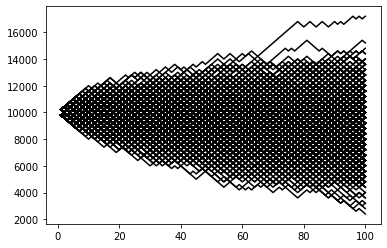

In [142]:
for a in range(1000):
  simple_bettor(10000, 200, 100, "black", 'black')

In [0]:
def doubler_bettor(funds, initial_wager, wager_count, our_bet, color):
    global doubler_busts
    global doubler_profits
    global doubler_cum_profit
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            if rollBall() == our_bet:
                value += wager
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager 
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value < 0:
                    currentWager += 10000000000000000
                    doubler_busts += 1
        elif previousWager == 'loss':
            if rollBall() == our_bet:
                wager = previousWagerAmount * 2
                if (value - wager) < 0:
                    wager = value
                    
                value += wager
                wager = initial_wager
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                wager = previousWagerAmount * 2
                if (value - wager) < 0:
                    wager = value
                value -= wager
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)

                if value <= 0:
                    currentWager += 10000000000000000
                    doubler_busts += 1

        currentWager += 1
    plt.plot(wX,vY,color)
    #####################
    if value > funds:
        doubler_profits+=1
    doubler_cum_profit += value

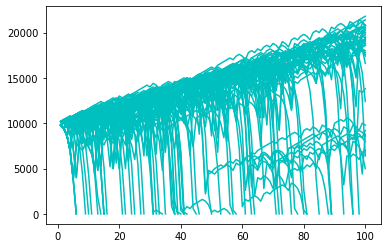

In [146]:
for a in range(100):
  doubler_bettor(10000, 200, 100, "black", 'c')

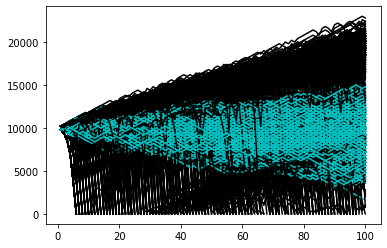

In [153]:
simple_busts = 0
simple_profits = 0
simple_cum_profit = 0 
doubler_busts = 0
doubler_profits = 0
doubler_cum_profit = 0 
for a in range(1000):
  simple_bettor(10000, 200, 100, 'black', 'c')
  doubler_bettor(10000, 200, 100, 'black', 'k')

In [154]:
print(f"Strategia prosta dała nam: {simple_busts / 1000 * 100}% bankrutów")
print(f"Strategia prosta dała nam: {simple_profits / 1000 * 100}% osób, które zarobiło")
print(f"Strategia prosta dała nam: {simple_cum_profit / 1000 - 10000} sredni profit")


Strategia prosta dała nam: 0.0% bankrutów
Strategia prosta dała nam: 27.800000000000004% osób, które zarobiło
Strategia prosta dała nam: -1000.3999999999996 sredni profit


In [155]:
print(f"Strategia prosta dała nam: {doubler_busts / 1000 * 100}% bankrutów")
print(f"Strategia prosta dała nam: {doubler_profits / 1000 * 100}% osób, które zarobiło")
print(f"Strategia prosta dała nam: {doubler_cum_profit / 1000 - 10000} sredni profit")

Strategia prosta dała nam: 54.1% bankrutów
Strategia prosta dała nam: 38.7% osób, które zarobiło
Strategia prosta dała nam: -2412.8 sredni profit


Symulacja inwestycji

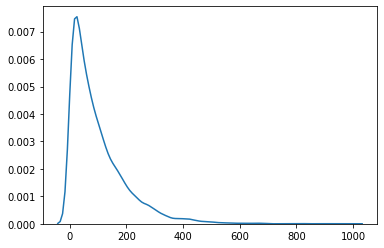

In [156]:
list_ = [random.expovariate(0.01) for i in range(10000)]
sns.distplot(list_, hist=False);

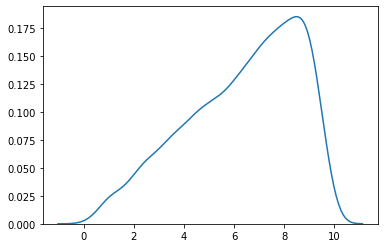

In [157]:
list_ = [random.triangular(0, 10, 9) for i in range(10000)]
sns.distplot(list_, hist=False);

Budujemy elektrownie gazową 

---

Czego nie wiemy o przyszłości?


1.   Jaka będzie cena prądu?
2.   Jaka będzie cena gazu?
3.   Jakie i czy będzie wsparcie z Rynku Mocy?
4.   Czy będzie awaria?
5.   Jeśli tak to ile będzie kosztować i jak długo potrwa postój?

---
Co wiemy?

1.  Koszt budowy elektrowni.
2.  Koszty operacyjne (pracownicy, itp.).
3.  Stałe koszty remontowe.




In [0]:
# Niewiadome w modelu

def powerPrice(date):
  price_mean = 250
  price_std = 40
  price = random.normalvariate(price_mean, price_std)
  return price

def gasPrice(date):
  price_mean = 70
  price_std = 10
  price = random.normalvariate(price_mean, price_std)
  return price

def rynekMocy(year):
  if random.random() > 0.9: return False 
  
  return True

def rynekMocyPrice(year):
  price = random.triangular(180, 250, 200)
  return price

def czyAwaria(date):
  if random.random() > 0.999: return True 

  return False

def dlugoscAwarii():
  duration = random.normalvariate(10, 5)
  if duration < 1: duration = 1
  
  return duration // 1

def kosztAwarii():
  cost_per_day = random.expovariate(0.01)*200
  return(cost_per_day)




In [0]:
dzialanie_startyear = 2025
dzialanie_stopyear = 2050
zuzycePaliwa = 1000
produkcjaPradu = 500

In [0]:
def profilElektrownia():
  awaria_duration = 0
  current_year_rynekMocy = 0
  profit = 0 
  for day in pd.date_range(str(dzialanie_startyear), str(dzialanie_stopyear + 1))[:-1]:
    if (day.day == 1) & (day.month == 1):
      if (rynekMocy(day.year)):
        current_year_rynekMocy = rynekMocyPrice(day.year)
      else:
        current_year_rynekMocy = 0
    ## czy awaria
    if awaria_duration == 0:
      if czyAwaria(day): 
        awaria_duration = dlugoscAwarii()
      else:
        day_cost = gasPrice(day) * zuzycePaliwa
        day_income = powerPrice(day) * produkcjaPradu + current_year_rynekMocy*produkcjaPradu
    
    else:
      day_cost = kosztAwarii()
      day_income = current_year_rynekMocy * produkcjaPradu
      awaria_duration -=1       
    profit += day_income - day_cost
  return profit

In [168]:
cum_profit = 0 
for a in range(50):
  cum_profit += profilElektrownia()

print(f"sredni profit to: {cum_profit//50}")

sredni profit to: 1404575366.0
